In [1]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
n = 20
m = 30
N = n + m
X = np.random.normal(loc = 2, scale = math.sqrt(3), size = n)
Y = np.random.normal(loc = 2, scale = math.sqrt(3), size = m) # same sample
print(X)
print(Y)

[ 4.77707629  3.97887245  1.91059204  0.82428186 -0.49735925  2.99992936
  1.37333885  1.47678303  1.28120602  1.07167685  1.04932488  1.45412712
  1.76688798  3.12327557  4.27562488  2.37197762  3.23557936 -0.94895095
 -0.5148174   1.94931652]
[ 3.58915685  2.70123135  4.29544811  3.207272    5.07011502  3.20005266
  1.35612183  2.17187755  3.00263427  3.84804328  3.46574768  2.58905819
  3.08598059  1.00382131  1.23552231  0.86259718  0.27255408  1.03158957
  2.49404662 -0.31423179 -1.36360258  1.54581053  5.31448738  1.94548484
  3.13257071  0.90262791  3.64780289 -0.7525316   0.72323828  0.49435313]


$
X_1, X_2,\ldots, X_{n} \overset{\mathrm{iid}}{\sim} F \\
Y_1, Y_2,\ldots, Y_{m} \overset{\mathrm{iid}}{\sim} G \\
m + n = N
$

We need to test:

$
H_0: F = G \\
H_1: F(\cdot) = G(\cdot + \theta)
$

with $\theta > 0$

Define the Wilcoxon rank-sum statistics:

$\hat{T} = \sum_{i=1}^n V(X_i)$, where $V(X_i)$ is the rank of $X_i$ in the pooled sample.

Under $H_0$, we have: $E(\hat{T}) = n\cdot\frac{N+1}{2}$, $Var(\hat{T}) = \frac{nm(N+1)}{12}$, and:

$\hat{V} = \frac{\hat{T} - E(\hat{T})}{\sqrt{Var(\hat{T})}} \rightarrow N(0, 1)$

Since $\theta > 0$, under $H_1$, $\mu_F < \mu_G$, so $R_\alpha = (-\infty, -Z_\alpha]$, and $\hat{p} = \phi(\hat{V})$

In [3]:
pooled = np.concatenate([X, Y])
pooled.sort()

rank = []
for x in X:
    for i in range(len(pooled)):
        if x == pooled[i]:
            rank.append(i + 1)
            break

T = sum(rank)
E_T = n * (N + 1) / 2
Var_T = n * m * (N + 1) / 12
V = (T - E_T) / math.sqrt(Var_T)

p = norm.cdf(V)

print(f"Stats is: {V}, p-value is {p}")

Stats is: -0.47527082062880366, p-value is 0.3172969771507489


(array([ 9., 14.,  8., 11.,  6., 10.,  8., 14.,  5., 15.]),
 array([0.00665493, 0.10559124, 0.20452755, 0.30346386, 0.40240017,
        0.50133648, 0.6002728 , 0.69920911, 0.79814542, 0.89708173,
        0.99601804]),
 <BarContainer object of 10 artists>)

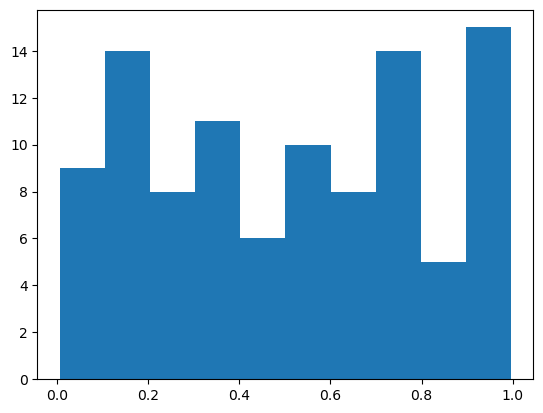

In [4]:
p_array = []
for _ in range(100):
    X = np.random.normal(loc = 2, scale = math.sqrt(3), size = n)
    Y = np.random.normal(loc = 2, scale = math.sqrt(3), size = m)
    pooled = np.concatenate([X, Y])
    pooled.sort()

    rank = []
    for x in X:
        for i in range(len(pooled)):
            if x == pooled[i]:
                rank.append(i + 1)
                break

    T = sum(rank)
    E_T = n * (N + 1) / 2
    Var_T = n * m * (N + 1) / 12
    V = (T - E_T) / math.sqrt(Var_T)

    p = norm.cdf(V)
    p_array.append(p)

plt.hist(p_array)

# Since H_0 is true, the distribution of p-values converges to U(0, 1)

(array([70., 19.,  6.,  1.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([8.40912480e-05, 9.29353416e-02, 1.85786592e-01, 2.78637842e-01,
        3.71489093e-01, 4.64340343e-01, 5.57191593e-01, 6.50042844e-01,
        7.42894094e-01, 8.35745344e-01, 9.28596595e-01]),
 <BarContainer object of 10 artists>)

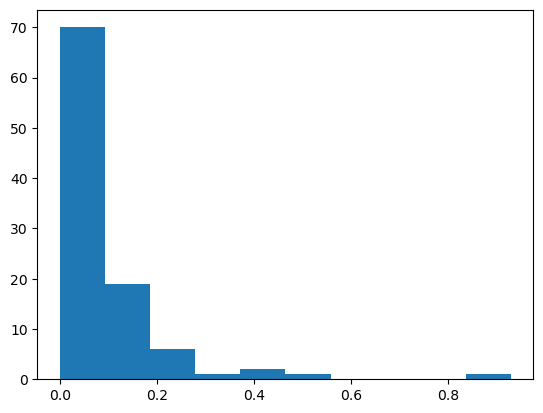

In [5]:
p_array = []
for _ in range(100):
    X = np.random.normal(loc = 2, scale = math.sqrt(3), size = n)
    Y = np.random.normal(loc = 3, scale = math.sqrt(3), size = m)
    pooled = np.concatenate([X, Y])
    pooled.sort()

    rank = []
    for x in X:
        for i in range(len(pooled)):
            if x == pooled[i]:
                rank.append(i + 1)
                break

    T = sum(rank)
    E_T = n * (N + 1) / 2
    Var_T = n * m * (N + 1) / 12
    V = (T - E_T) / math.sqrt(Var_T)

    p = norm.cdf(V)
    p_array.append(p)

plt.hist(p_array)

# Since H_0 is false, p-value converges to 0